In [1]:
import tensorflow as tf


#### Loading MNIST DATA Set
#### Containing training samples= 60000, Testing Samples = 10000


### Tensorflow already contains Mnist data set which can be loaded using keras

In [2]:
mnist = tf.keras.datasets.mnist  
# this is basically handwritten Characters based on 28x28 sized images of 0 to 9

## Divide into train and test datasets

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt


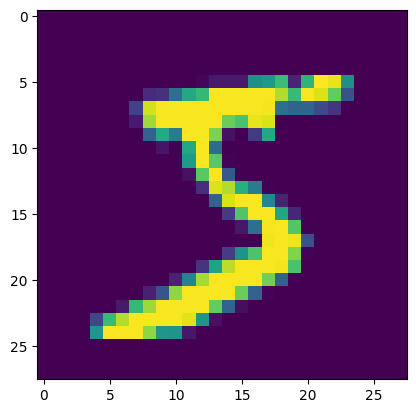

In [6]:
plt.imshow(X_train[0])
plt.show()

### Checking the values of each pixel before normalization

In [7]:
print(X_train[0]) ### Before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
# Normalize images to [0,1]
X_train=X_train/255
X_test = X_test/255

### After normalization


In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
print(y_train[0]) # just to check that we have labels inside our network

5


### Resizing images to make it suitable for apply Convolution operations

In [11]:
import numpy as np
img_size=28
X_train=np.array(X_train).reshape(-1,img_size,img_size,1) # Increasing one dimension for kernel/filter operation
X_test=np.array(X_test).reshape(-1,img_size,img_size,1)
print("Training Samples Dimensions",X_train.shape)
print("Testing Samples Dimensions",X_test.shape)


Training Samples Dimensions (60000, 28, 28, 1)
Testing Samples Dimensions (10000, 28, 28, 1)


## Creating a Deep Neural Network

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [13]:
# Create a neural network  now
model =Sequential()

# First Convolutional layer
model.add(Conv2D(64,(3,3),input_shape=X_train.shape[1:])) #Only for first convolutional layer to  mention input layer size
model.add(Activation('relu')) # activation function
model.add(MaxPooling2D(pool_size=(2,2))) # MaxPooling 

# Second Convolutional Layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third Convolutional layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Before using fully connected ayer, we need to flatten 2D feature map into 1D vector,
model.add(Flatten())

#Fully connected layer 1
model.add(Dense(64))
model.add(Activation('relu'))
        
#Fully connected layer 2
model.add(Dense(32))
model.add(Activation('relu'))

#Last fully connected layer, output must be equal to no. of classes , 10 (0-9)
model.add(Dense(10)) # this last dense layer must be equal to 10
model.add(Activation('softmax')) # Because we are solving multiclass problem.


          




c:\Python\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [17]:
model.fit(X_train,y_train,epochs=50,validation_split=0.3,
         callbacks=[early_stopping_callback])  # Training my model

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8070 - loss: 0.5999 - val_accuracy: 0.9683 - val_loss: 0.1059
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9709 - loss: 0.0927 - val_accuracy: 0.9694 - val_loss: 0.0977
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9797 - loss: 0.0634 - val_accuracy: 0.9813 - val_loss: 0.0627
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9833 - loss: 0.0487 - val_accuracy: 0.9808 - val_loss: 0.0658
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9865 - loss: 0.0440 - val_accuracy: 0.9797 - val_loss: 0.0700
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9893 - loss: 0.0333 - val_accuracy: 0.9845 - val_loss: 0.0537
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9919 - loss: 0.0268 - val_accuracy: 0.9839 - val_loss: 0.0616
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.9921 -

In [18]:
print(X_train.shape)

(60000, 28, 28, 1)


In [19]:
print(y_train.shape)

(60000,)


In [20]:
model.save('mnist_cnn.keras')

### Now evaluating our model on testing data set of mnit

In [21]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print(f"Test loss on 10,000 test samples = {test_loss:.3f}")
print(f"Validation Accuracy on 10,000 test samples = {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9802 - loss: 0.0712
Test loss on 10,000 test samples = 0.056
Validation Accuracy on 10,000 test samples = 0.985


In [22]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [23]:
print(predictions) #these predictions are based on one hot encoding so these are only arrays in form of probability, because of softmax 

[[5.6730927e-09 3.0637548e-06 1.8681078e-05 ... 9.9996388e-01
  3.0643409e-07 7.7411096e-06]
 [1.1913949e-07 4.3054062e-08 9.9999845e-01 ... 3.2534320e-08
  1.2882271e-07 4.8739340e-10]
 [2.3775767e-06 9.9991107e-01 1.3404489e-06 ... 9.9938334e-06
  2.4904891e-06 2.6003752e-06]
 ...
 [2.0108186e-09 1.9171748e-07 1.1301255e-08 ... 1.7266827e-09
  3.4006806e-07 2.4493366e-07]
 [1.0577081e-06 5.3617586e-09 7.7115635e-07 ... 8.9181088e-07
  4.0141807e-04 7.7835670e-05]
 [1.2787652e-05 1.4282850e-09 2.9835260e-07 ... 1.8670240e-10
  8.6670727e-05 1.4921728e-06]]


In [24]:
print(np.argmax(predictions[0])) # argmax will return the maximum value index and find the value of it.

7


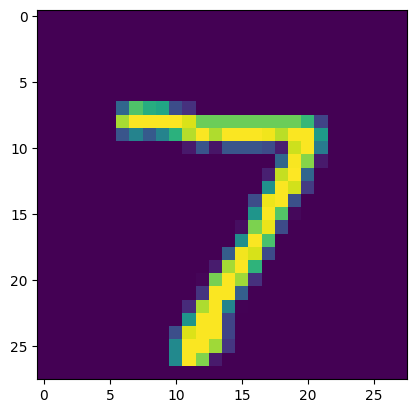

In [25]:
# Lets check our answer is true or not
plt.imshow(X_test[0])

In [26]:
print(np.argmax(predictions[120]))

5


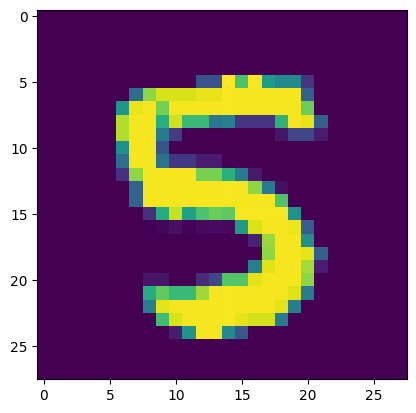

In [27]:
plt.imshow(X_test[120])